In [16]:
# Import Dependecies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load Data
data = pd.read_csv('Data/Salt_Lake.csv')
print(data.shape, "\n", data.columns)

(38615, 46) 
 Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [18]:
# Check for missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38615 entries, 0 to 38614
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     38615 non-null  object 
 1   Source                 38615 non-null  object 
 2   Severity               38615 non-null  int64  
 3   Start_Time             38615 non-null  object 
 4   End_Time               38615 non-null  object 
 5   Start_Lat              38615 non-null  float64
 6   Start_Lng              38615 non-null  float64
 7   End_Lat                25654 non-null  float64
 8   End_Lng                25654 non-null  float64
 9   Distance(mi)           38615 non-null  float64
 10  Description            38615 non-null  object 
 11  Street                 38400 non-null  object 
 12  City                   38615 non-null  object 
 13  County                 38615 non-null  object 
 14  State                  38615 non-null  object 
 15  Zi

In [19]:
# Descriptive Statistics
print(data.describe())

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  38615.000000  38615.000000  38615.000000  25654.000000  25654.000000   
mean       2.193111     40.666210   -111.917352     40.669468   -111.915527   
std        0.454057      0.082238      0.072151      0.082282      0.078817   
min        1.000000     40.435399   -112.224480     40.284849   -112.950776   
25%        2.000000     40.610707   -111.949400     40.618509   -111.949403   
50%        2.000000     40.683925   -111.904427     40.694835   -111.904497   
75%        2.000000     40.725460   -111.893014     40.725890   -111.891425   
max        4.000000     40.832169   -111.579520     40.957031   -111.390322   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  38615.000000    37784.000000   31866.000000  37776.000000   
mean       0.431024       53.103806      49.096730     53.560965   
std        1.093567       21.828664      24.666624     26.234039   
min        0.000

In [20]:
# Boolean to Categorical
data['Amenity'] = data['Amenity'].astype('category').cat.codes
data['Bump'] = data['Bump'].astype('category').cat.codes
data['Crossing'] = data['Crossing'].astype('category').cat.codes
data['Give_Way'] = data['Give_Way'].astype('category').cat.codes
data['Junction'] = data['Junction'].astype('category').cat.codes
data['No_Exit'] = data['No_Exit'].astype('category').cat.codes
data['Railway'] = data['Railway'].astype('category').cat.codes
data['Roundabout'] = data['Roundabout'].astype('category').cat.codes
data['Station'] = data['Station'].astype('category').cat.codes
data['Stop'] = data['Stop'].astype('category').cat.codes
data['Traffic_Calming'] = data['Traffic_Calming'].astype('category').cat.codes
data['Traffic_Signal'] = data['Traffic_Signal'].astype('category').cat.codes
data['Turning_Loop'] = data['Turning_Loop'].astype('category').cat.codes

# String to Categorical
data['City_Code'] = data['City'].astype('category').cat.codes
data['Street_Code'] = data['Street'].astype('category').cat.codes
data['Weather_Condition'] = data['Weather_Condition'].astype('category').cat.codes
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].astype('category').cat.codes
data['Civil_Twilight'] = data['Civil_Twilight'].astype('category').cat.codes
data['Nautical_Twilight'] = data['Nautical_Twilight'].astype('category').cat.codes
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].astype('category').cat.codes


print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38615 entries, 0 to 38614
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     38615 non-null  object 
 1   Source                 38615 non-null  object 
 2   Severity               38615 non-null  int64  
 3   Start_Time             38615 non-null  object 
 4   End_Time               38615 non-null  object 
 5   Start_Lat              38615 non-null  float64
 6   Start_Lng              38615 non-null  float64
 7   End_Lat                25654 non-null  float64
 8   End_Lng                25654 non-null  float64
 9   Distance(mi)           38615 non-null  float64
 10  Description            38615 non-null  object 
 11  Street                 38400 non-null  object 
 12  City                   38615 non-null  object 
 13  County                 38615 non-null  object 
 14  State                  38615 non-null  object 
 15  Zi

In [21]:
# Duration of the accidents
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='mixed')
data['End_Time'] = pd.to_datetime(data['End_Time'], format='mixed')
data['Duration'] = data['End_Time'] - data['Start_Time']
data['Duration'] = data['Duration'].dt.total_seconds() / 60
data = data[np.abs(stats.zscore(data['Duration'])) < 3].reset_index(drop=True)
print(data['Duration'].shape)
print(data['Duration'].describe())


(38556,)
count    38556.000000
mean       100.703864
std        122.092996
min          4.500000
25%         45.000000
50%         60.583333
75%         95.000000
max       1682.000000
Name: Duration, dtype: float64


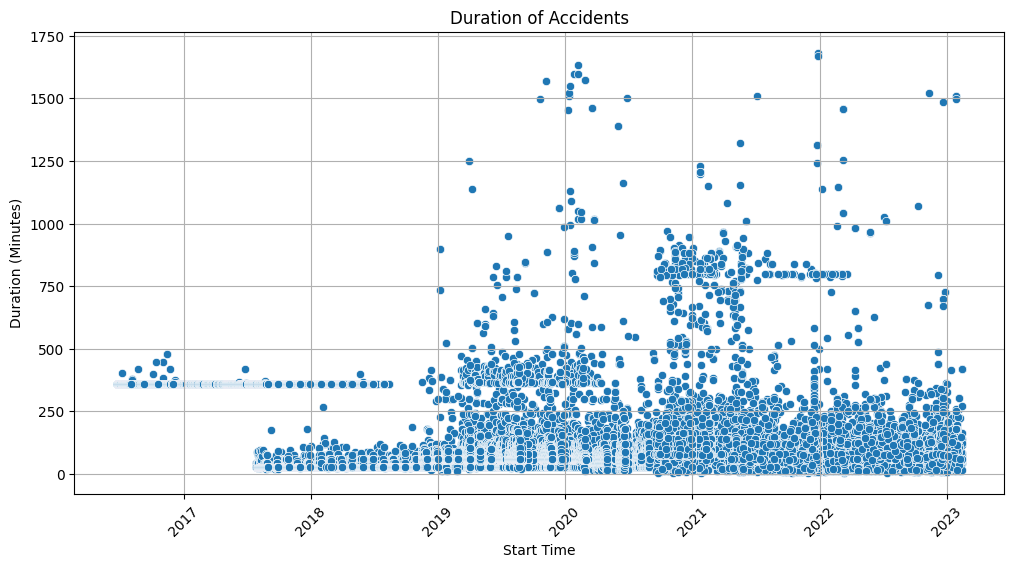

In [22]:
# Plotting the duration of the accidents
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Start_Time', y='Duration', data=data)
plt.xlabel('Start Time')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.title('Duration of Accidents')
plt.show()


In [23]:
# Date and Time
data['Date'] = data['Start_Time'].dt.date
data['Time'] = data['Start_Time'].dt.time
data['Hour'] = data['Start_Time'].dt.hour
data['Weekday'] = data['Start_Time'].dt.day_name()
data['Month'] = data['Start_Time'].dt.month_name()
data['Year'] = data['Start_Time'].dt.year

# Last 3 years
data = data[data['Year'] > 2018].reset_index(drop=True)
print(data['Duration'].describe())

count    30665.000000
mean        93.803810
std        114.827815
min          4.500000
25%         58.000000
50%         65.000000
75%         92.500000
max       1682.000000
Name: Duration, dtype: float64


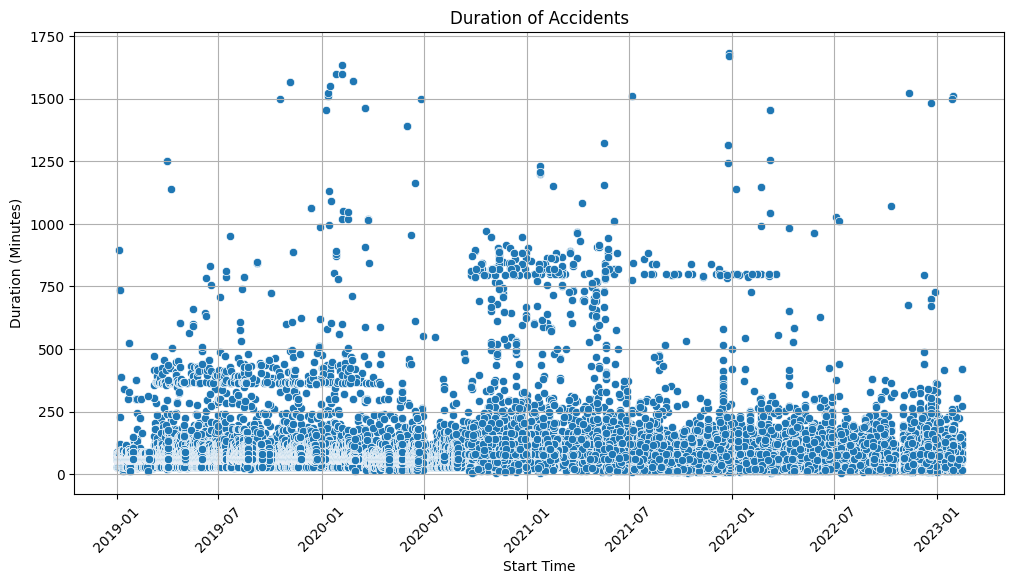

In [24]:
# Plotting the duration of the accidents for the last 3 years
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Start_Time', y='Duration', data=data)
plt.xlabel('Start Time')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.title('Duration of Accidents')
plt.show()


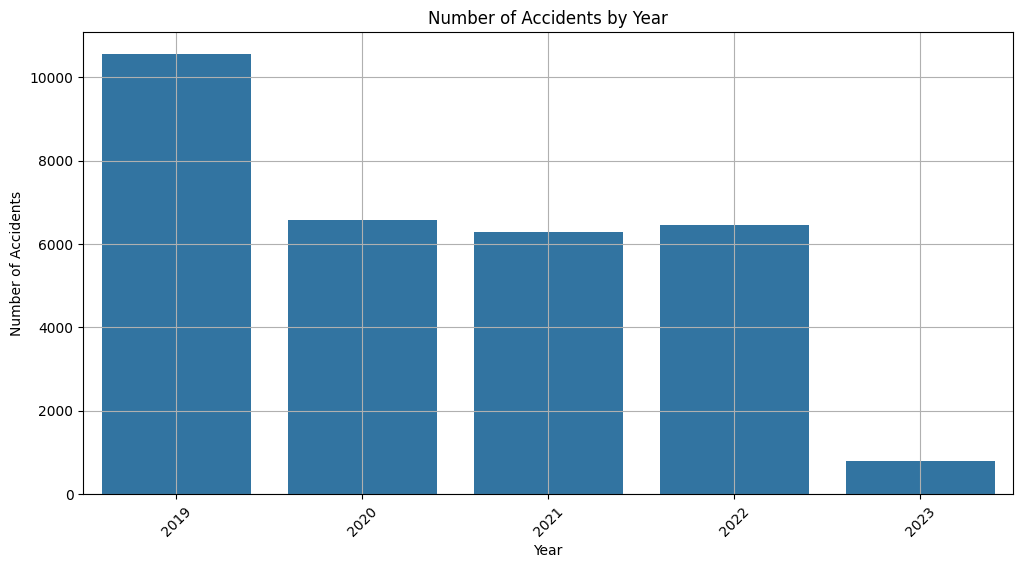

In [25]:
# Plotting the number of accidents by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid()
plt.title('Number of Accidents by Year')
plt.show()

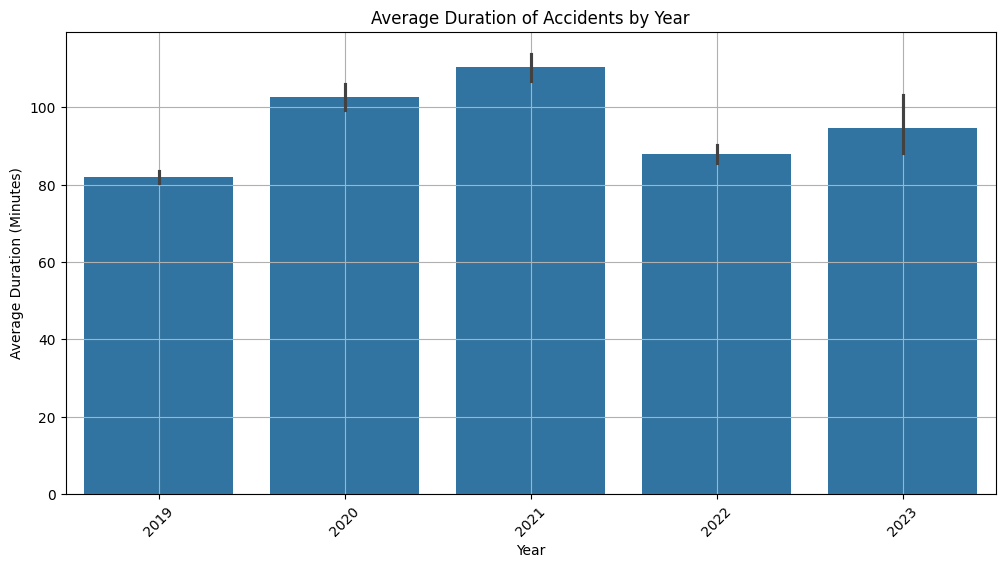

In [26]:
# Average duration of accidents by year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Duration', data=data)
plt.xlabel('Year')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.title('Average Duration of Accidents by Year')
plt.show()

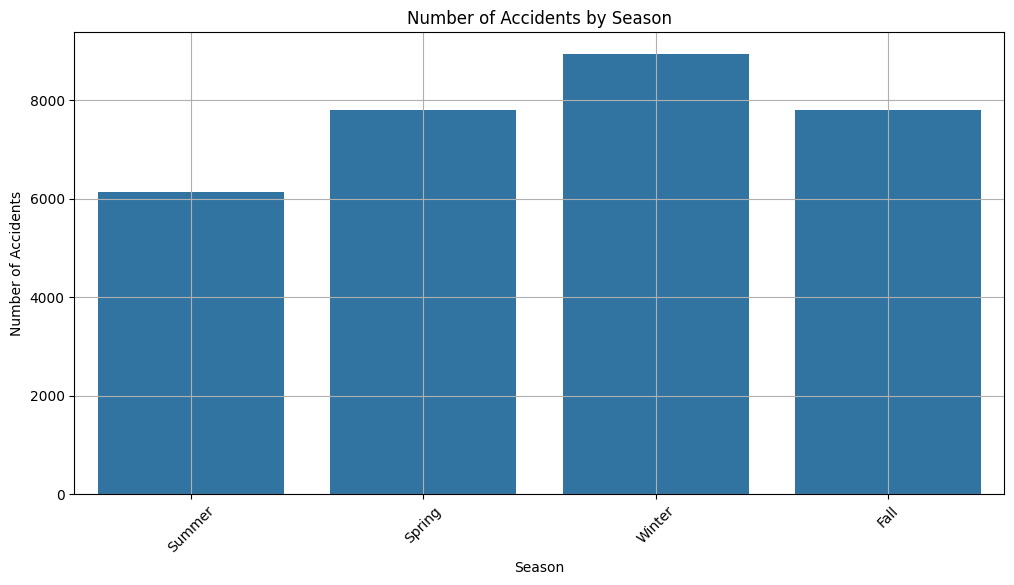

In [27]:
# Seasonality
data['Season_Code'] = data['Start_Time'].dt.quarter
data['Season'] = data['Season_Code'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Plotting the number of accidents by season
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=data)
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid()
plt.title('Number of Accidents by Season')
plt.show()


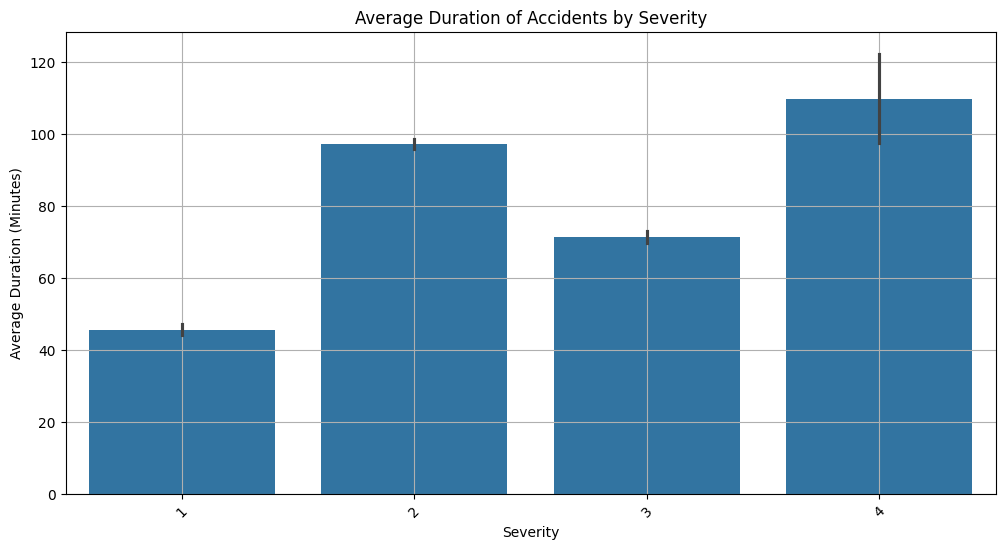

In [28]:
# Average duration of accidents by Severity
plt.figure(figsize=(12, 6))
sns.barplot(x='Severity', y='Duration', data=data)
plt.xlabel('Severity')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.title('Average Duration of Accidents by Severity')
plt.show()

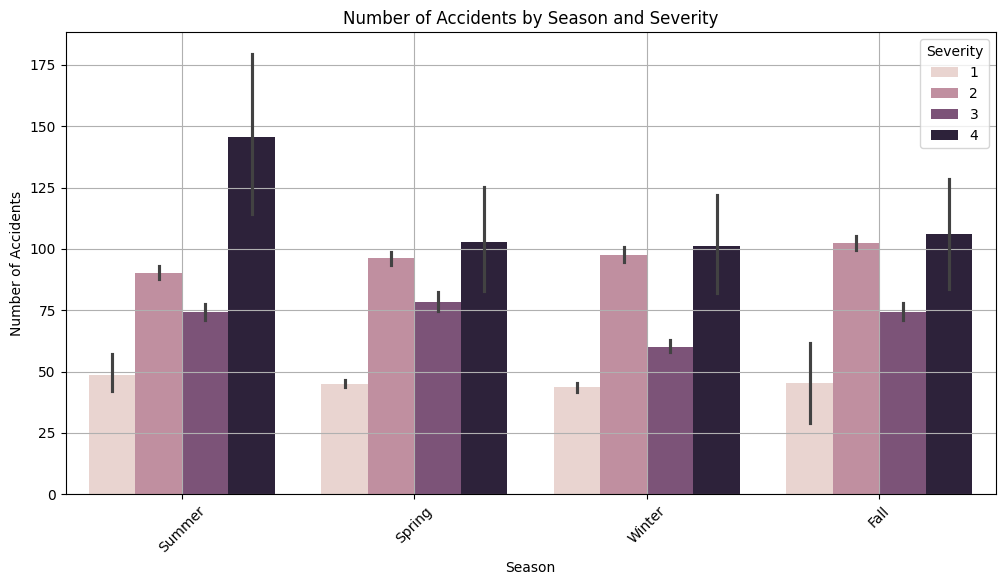

In [29]:
# Comparing the number of accidents by Severity with Season
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', hue='Severity', y='Duration', data=data)
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid()
plt.title('Number of Accidents by Season and Severity')
plt.show()

In [30]:
# Matrix of Correlation
corr = data[['Severity', 'Hour', 'Distance(mi)', 'Street_Code', 'City_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].corr()
print(corr.unstack().sort_values().drop_duplicates())


Temperature(F)         Humidity(%)             -0.826240
Humidity(%)            Wind_Chill(F)           -0.823062
                       Visibility(mi)          -0.518452
Temperature(F)         Sunrise_Sunset          -0.368318
Sunrise_Sunset         Wind_Chill(F)           -0.358733
                                                  ...   
Astronomical_Twilight  Nautical_Twilight        0.866527
Sunrise_Sunset         Civil_Twilight           0.878189
Wind_Chill(F)          Temperature(F)           0.993803
Astronomical_Twilight  Astronomical_Twilight    1.000000
Severity               Roundabout                    NaN
Length: 353, dtype: float64


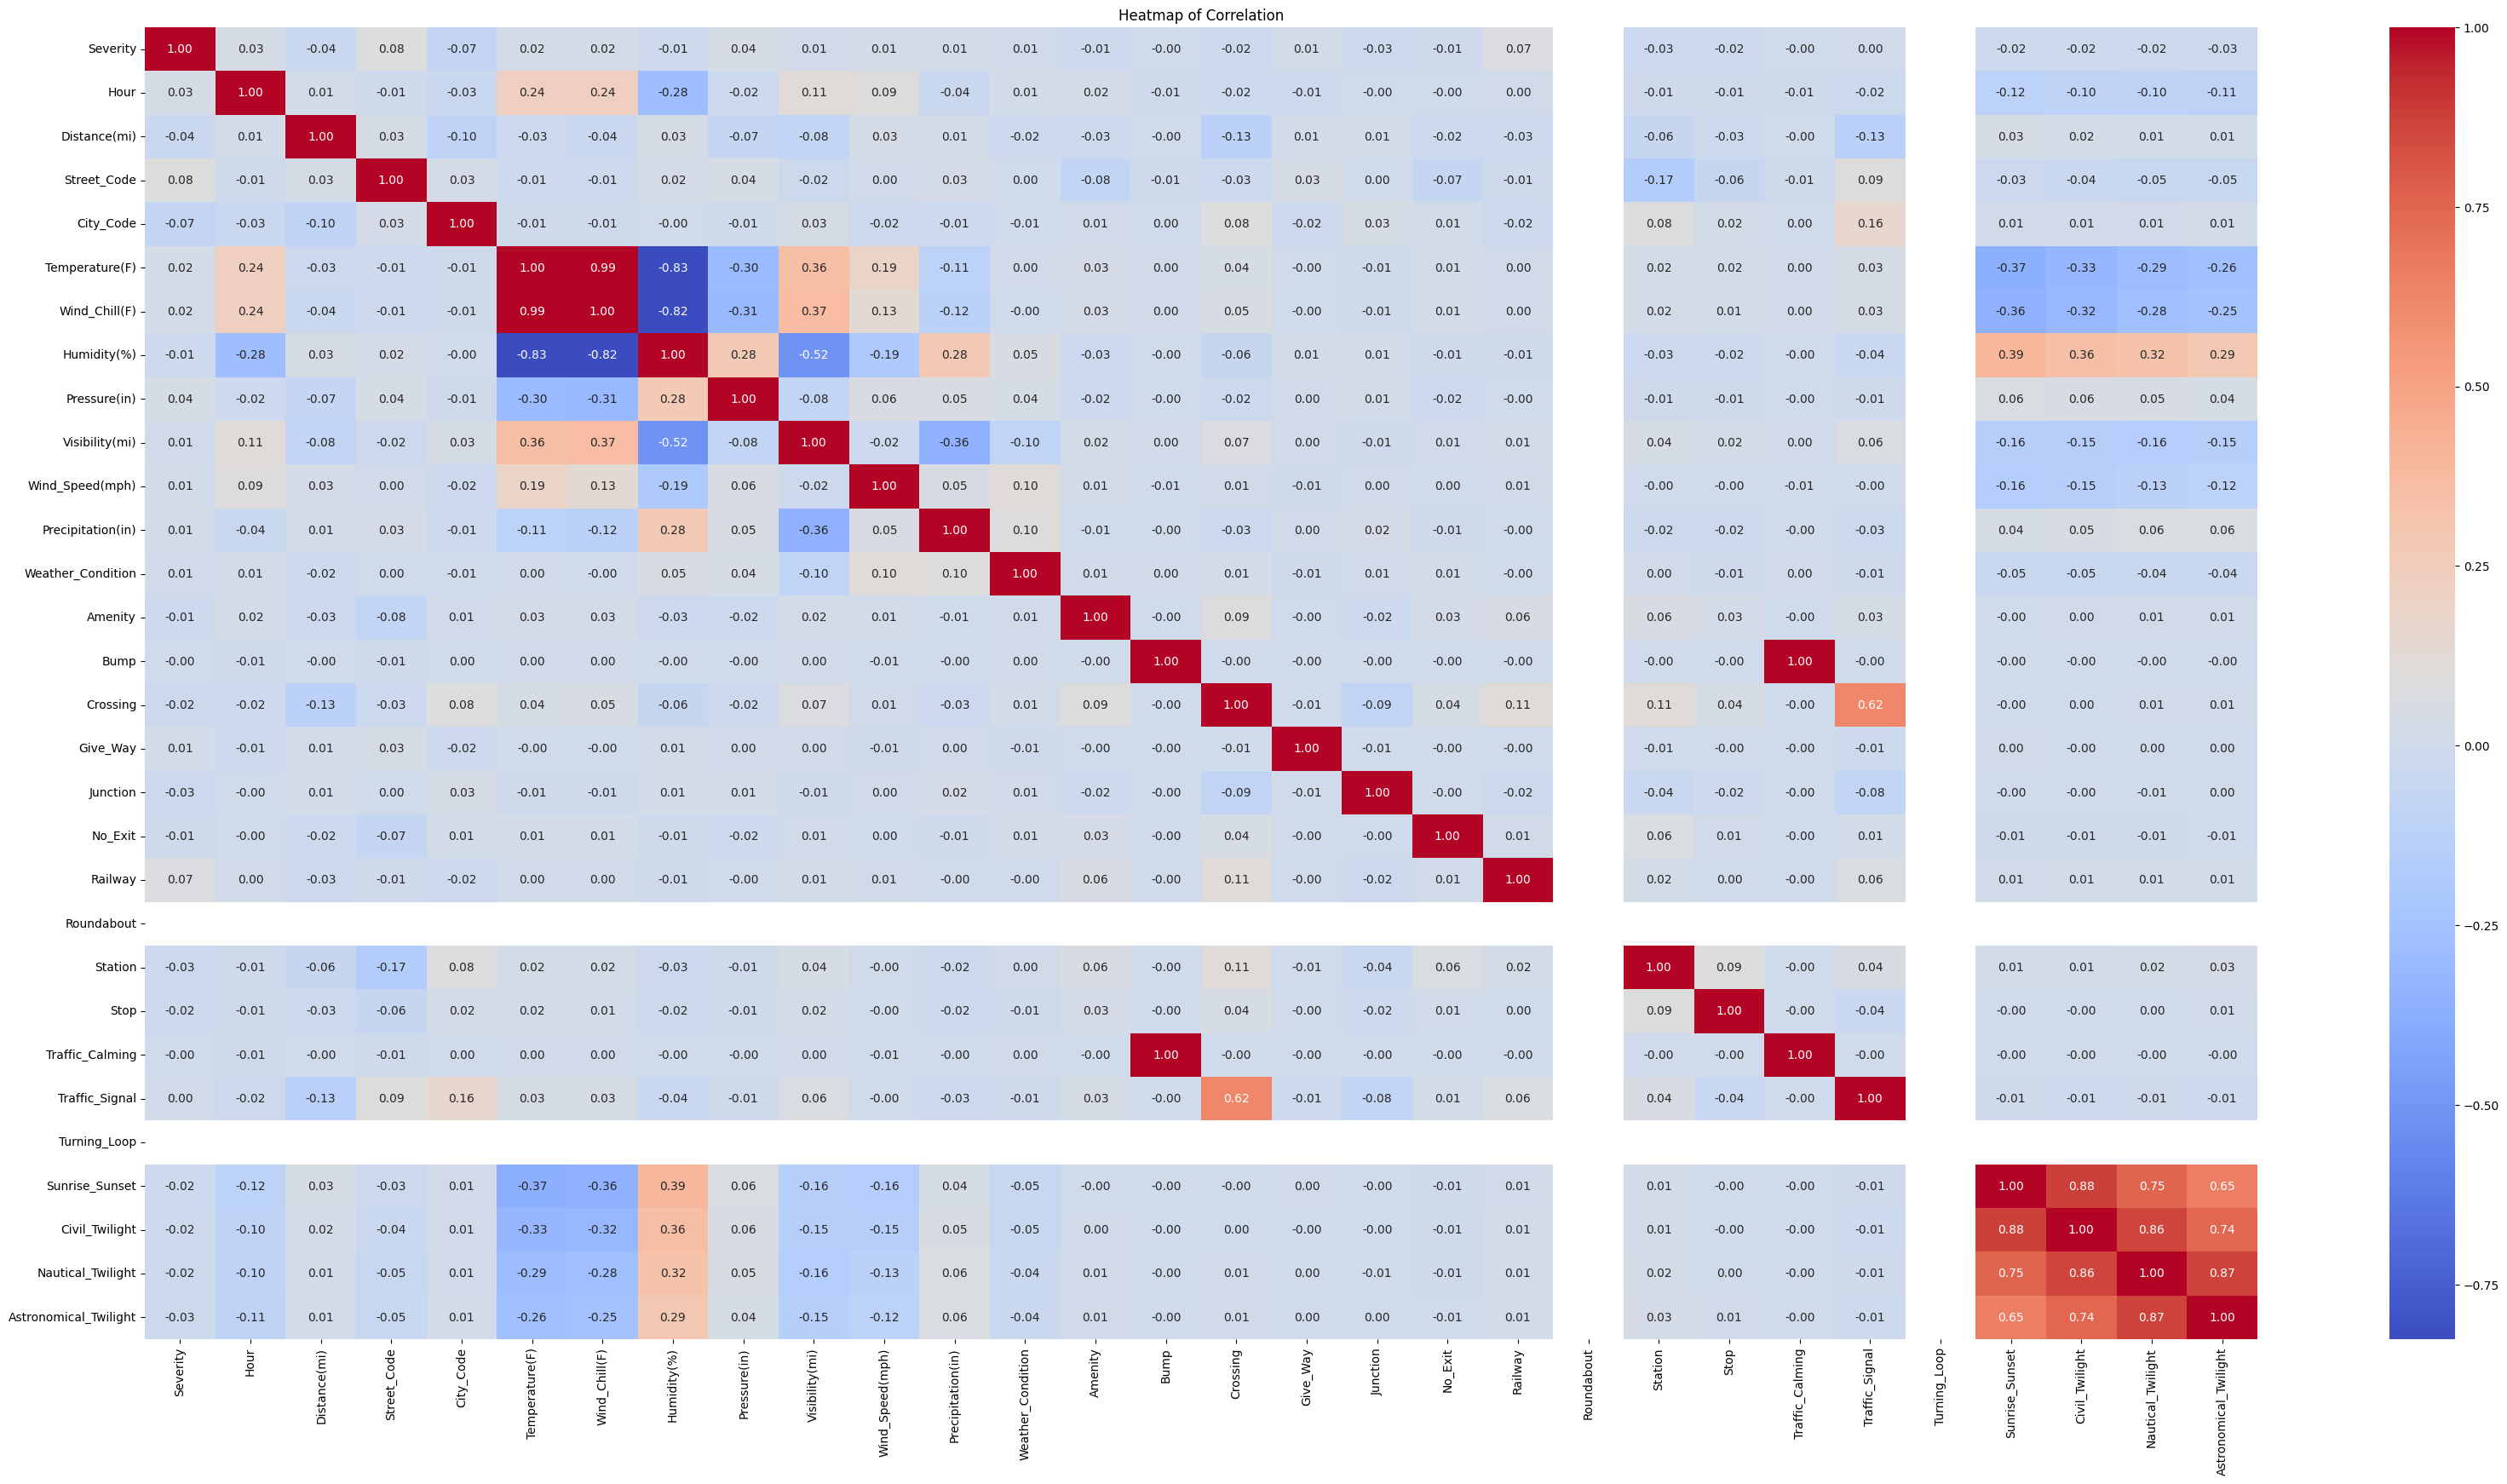

In [31]:
# Heatmap of Correlation
plt.figure(figsize=(40, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation')
plt.show()

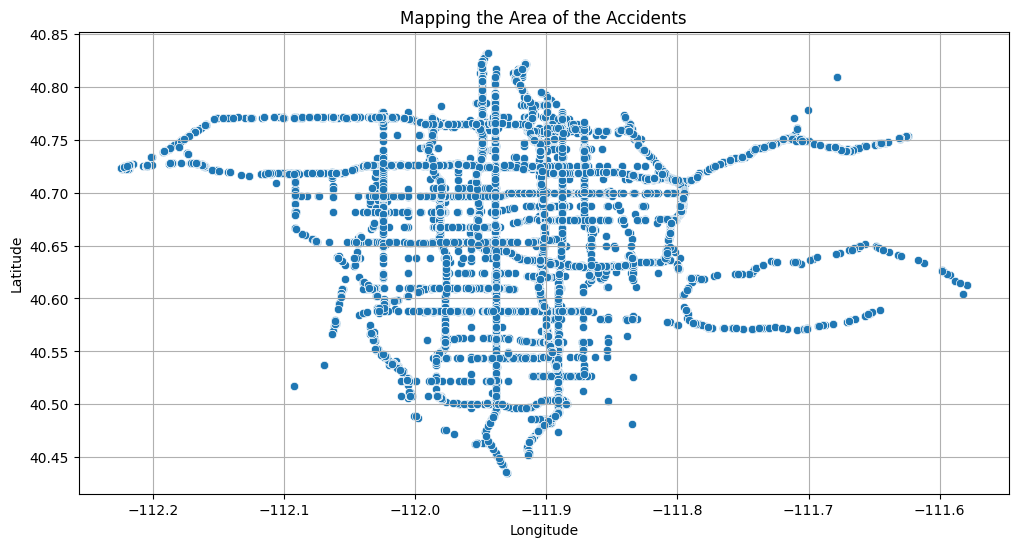

In [32]:
# Mapping the area of the accidents
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=data)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.title('Mapping the Area of the Accidents')
plt.show()

In [33]:
# Group by Street
street = data.groupby('Street')['ID'].count().reset_index()
street = street.sort_values('ID', ascending=False).head(10)
print(street)

            Street    ID
564         I-15 N  4041
565         I-15 S  3786
573         I-80 W  1672
572         I-80 E  1429
563           I-15  1267
568        I-215 N  1021
456  Bangerter Hwy   906
569        I-215 S   882
567        I-215 E   686
768       UT-201 W   627


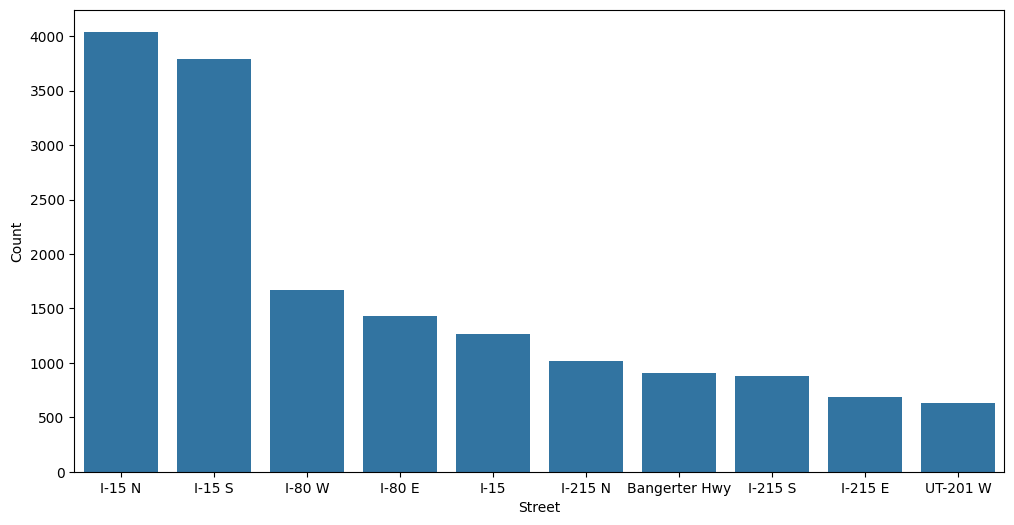

In [34]:
# Plotting the number of accidents by Street
plt.figure(figsize=(12, 6))
sns.barplot(x='Street', y='ID', data=street)
plt.xlabel('Street')
plt.ylabel('Count')
plt.show()